## Task 1

# TASK 1A: EXPLORATORY DATA ANALYSIS

In [104]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [37]:
df = pd.read_csv('./data/ODI-2023.csv', sep=';')
df.head()

,Tijdstempel,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,I have used ChatGPT to help me with some of my study assignments,When is your birthday (date)?,How many students do you estimate there are in the room?,Did you stand up to come to your previous answer ?,What is your stress level (0-100)?,How many hours per week do you do sports (in whole hours)?,Give a random number,Time you went to bed Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
0,4-4-2023 12:08:33,Masters - AI,yes,0,mu,nee,gender fluid,yes,23/11/1997,319,unknown,100,0,69,11:30,Ashes,Not ashes
1,4-4-2023 12:08:36,Artificial Intelligence,no,0,sigma,nee,male,not willing to say,"5th August, 1995",600,no,60,2,42,23.00,good food,good sleep
2,4-4-2023 12:08:38,AI,no,0,mu,nee,female,no,21/09,220,no,20,5,17,23:30,Sports,Friends
3,4-4-2023 12:08:52,Data mining,yes,1,mu,ja,male,yes,25-06-1996,100,unknown,50,5,12,11,Gym,Piano
4,4-4-2023 12:08:59,Quantitative Risk Management,no,0,mu,nee,male,yes,18-08-1998,300,no,65,10,874,11,Relax,Sun


In [29]:
df = df.rename(columns={'Tijdstempel': 'send_date', 'What programme are you in?': 'program', 'Have you taken a course on machine learning?': 
                        'taken_machine_learning_course', 'Have you taken a course on information retrieval?': 'taken_information_retrieval_course', 
                        'Have you taken a course on statistics?': 'taken_statistics_course', 'Have you taken a course on databases?': 
                        'taken_database_course', 'What is your gender?': 'gender', 'I have used ChatGPT to help me with some of my study assignments ': 
                        'have_used_chatgpt', 'When is your birthday (date)?': 'birthdate', 'How many students do you estimate there are in the room?':
                        'students_in_the_room_gamble', 'Did you stand up to come to your previous answer    ?': 'stood_up', 'Give a random number': 'random_number', 
                        'What is your stress level (0-100)?':'stresslevel', 'How many hours per week do you do sports (in whole hours)? ': 'hours_of_sports_week', 
                        'Time you went to bed Yesterday': 'time_to_bed', 'What makes a good day for you (1)?': 'good_day_1', 'What makes a good day for you (2)?': 
                        'good_day_2'})
df.columns

Index(['send_date', 'program', 'taken_machine_learning_course',
       'taken_information_retrieval_course', 'taken_statistics_course',
       'taken_database_course', 'gender', 'have_used_chatgpt', 'birthdate',
       'students_in_the_room_gamble', 'stood_up', 'stresslevel',
       'hours_of_sports_week', 'random_number', 'time_to_bed', 'good_day_1',
       'good_day_2'],
      dtype='object')

In [30]:
df.head()

,send_date,program,taken_machine_learning_course,taken_information_retrieval_course,taken_statistics_course,taken_database_course,gender,have_used_chatgpt,birthdate,students_in_the_room_gamble,stood_up,stresslevel,hours_of_sports_week,random_number,time_to_bed,good_day_1,good_day_2
0,4-4-2023 12:08:33,Masters - AI,yes,0,mu,nee,gender fluid,yes,23/11/1997,319,unknown,100,0,69,11:30,Ashes,Not ashes
1,4-4-2023 12:08:36,Artificial Intelligence,no,0,sigma,nee,male,not willing to say,"5th August, 1995",600,no,60,2,42,23.00,good food,good sleep
2,4-4-2023 12:08:38,AI,no,0,mu,nee,female,no,21/09,220,no,20,5,17,23:30,Sports,Friends
3,4-4-2023 12:08:52,Data mining,yes,1,mu,ja,male,yes,25-06-1996,100,unknown,50,5,12,11,Gym,Piano
4,4-4-2023 12:08:59,Quantitative Risk Management,no,0,mu,nee,male,yes,18-08-1998,300,no,65,10,874,11,Relax,Sun


In [31]:
# Print how many rows/columns there are
df.shape

(305, 17)

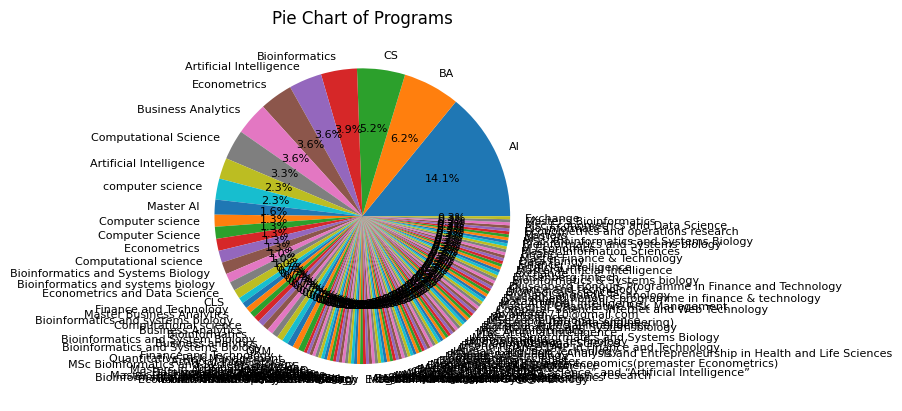

In [32]:
# count the number of occurrences of each program in the program column
program_counts = df['program'].value_counts()
plt.pie(program_counts, labels=program_counts.index, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.title('Pie Chart of Programs')
plt.show()

In [33]:
len(df['program'].unique())

129

#### As observed in the above pie chart we see that the course entered by the participants is not in standard format / convention and there are 129 differrent categories , so we need to further map all the categories to a standard name for further analysis

# TASK 1B: DATA CLEANING


In [155]:
df = pd.read_csv('./data/ODI-2023.csv', sep=';')
df = df.rename(columns={'Tijdstempel': 'send_date', 'What programme are you in?': 'program', 'Have you taken a course on machine learning?': 
                        'taken_machine_learning_course', 'Have you taken a course on information retrieval?': 'taken_information_retrieval_course', 
                        'Have you taken a course on statistics?': 'taken_statistics_course', 'Have you taken a course on databases?': 
                        'taken_database_course', 'What is your gender?': 'gender', 'I have used ChatGPT to help me with some of my study assignments ': 
                        'have_used_chatgpt', 'When is your birthday (date)?': 'birthdate', 'How many students do you estimate there are in the room?':
                        'students_in_the_room_gamble', 'Did you stand up to come to your previous answer    ?': 'stood_up', 'Give a random number': 'random_number', 
                        'What is your stress level (0-100)?':'stresslevel', 'How many hours per week do you do sports (in whole hours)? ': 'hours_of_sports_week', 
                        'Time you went to bed Yesterday': 'time_to_bed', 'What makes a good day for you (1)?': 'good_day_1', 'What makes a good day for you (2)?': 
                        'good_day_2'})
df.columns

Index(['send_date', 'program', 'taken_machine_learning_course',
       'taken_information_retrieval_course', 'taken_statistics_course',
       'taken_database_course', 'gender', 'have_used_chatgpt', 'birthdate',
       'students_in_the_room_gamble', 'stood_up', 'stresslevel',
       'hours_of_sports_week', 'random_number', 'time_to_bed', 'good_day_1',
       'good_day_2'],
      dtype='object')

In [156]:
df['program'] = df['program'].replace('(.*Artificial.*|.*AI.*|.*Ai.*|.*Artificial.*|.*Artifscial.*)', 'AI', regex=True)
df['program'] = df['program'].replace('(.*CS.*|.*computer.* | .*Computer.* |.*Computer science.*|.*Masters cs.*|.*computer science.* |.*Big data engineering.*)',  'CS', regex=True)
df['program'] = df['program'].replace('(.*Bioinformatics.*|.*Systems Biology.*|.*Bio-informatics.*|.*bioinformatics.*|.*Bionformatics.*)' , 'Bioinformatics', regex=True)
df['program'] = df['program'].replace('(.*Biomedical Sciences.*|.*Biomedical sciences.*)', 'Biomedical', regex=True)
df['program'] = df['program'].replace('(^Eco.* | .*eco.* | .*Eco.* | .*Economic.* |.*Econometric.* | .*econometric.*)', 'Econometrics', regex=True)
df['program'] = df['program'].replace('(.*Finance.* | .*finance.*| .*Financial.*| .*financial.*)', 'Finance', regex=True)
df['program'] = df['program'].replace('(.*Busi.*| .*busi.* |.*BA.*| ^busi.*)', 'BA', regex=True)
df['program'] = df['program'].replace('(.*Computational.*)', 'ComputationalScience', regex=True)



len(df['program'].unique())

52

In [151]:
df['program'].unique()

array(['AI', 'Data mining', 'Quantitative Risk Management', 'BA',
       'ComputationalScience', 'Master of Quantitative Risk Management ',
       'computer science', 'Bioinformatics', 'CS',
       'aryamaan710@gmail.com', 'Neuroscience',
       'MSc computational science ', 'Finance', 'EconometricsScience',
       '116', 'Human language technology ', 'Econometrics',
       'EconometricsMSc', 'FinanceTechnology', 'DuisenbergFinance', 'CLS',
       'Human Language Technology', 'Human Language Technology ',
       'finance and technology ', 'Econometricsresearch', 'Masters',
       'M Economics', 'Master Information Sciences', 'Data thingy',
       'exchange', 'Duisenberg fintech', 'Biomedical',
       'Management, Policy Analysis and Entrepreneurship in Health and Life Sciences',
       'QRM', 'Financial Econometrics', 'Hyperbolic Time Chamber',
       'Data science & Econometrics', 'business analytics ',
       'External PhD student', 'EconometricsResearch',
       'EconometricsEconome

In [128]:
len(df['program'].unique())

53

# TASK 1C: FEATURE ENGINEERING

## Task 2

TASK 2A: APPLICATION OF CLASSIFICATION ALGORITHMS

TASK 2B: WINNING CLASSIFICATION ALGORITHMS

### Task 3 : ASSOCIATION RULES

### TASK 4: NUMERICAL PREDICTION

## Task 5

TASK 5A: CHARACTERISTICS OF EVALUATION METRICS

TASK 5B: IMPACT OF EVALUATION METRICS